<a href="https://colab.research.google.com/github/lhlanh/lhlanh/blob/main/HW%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0000e+00 - loss: 2.8870
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2722 - loss: 3.4353
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 4.2529
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 3.8518
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4111 - loss: 2.4747
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4111 - loss: 1.3390
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6611 - loss: 0.7633
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 3.3178
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9333 - loss: 0.7521
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5861 - loss: 1.0964
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7528 - loss: 0.6247
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accur

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


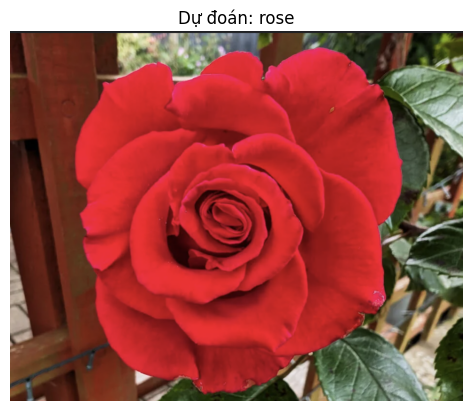

'rose'

In [8]:
#Nhan dien hoa
from PIL import Image
import numpy as np
from tensorflow.keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import os
import numpy as np
from PIL import Image
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Cấu hình nhãn
label_map = {
    "palm": 0,
    "not_palm": 1
}
class_names = ["Lòng bàn tay", "Không phải lòng bàn tay"]

# Đường dẫn đến dữ liệu đã tải
data_dir = "/content/Palm-Detection-1"

# Load và xử lý ảnh
X = []
Y = []
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if not os.path.isdir(folder_path) or folder not in label_map:
        continue
    label = label_map[folder]
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        try:
            img = Image.open(img_path).resize((64, 64)).convert("RGB")
            x = np.array(img).astype("float32") / 255.0
            X.append(x)
            Y.append(label)
        except:
            print(f"Bỏ qua ảnh lỗi: {img_path}")

X = np.array(X)
Y = np.array(Y)
X_flat = X.reshape((X.shape[0], 64 * 64 * 3))
Y_oh = to_categorical(Y, num_classes=2)
X_flat, Y_oh = shuffle(X_flat, Y_oh, random_state=42)

# Xây dựng mô hình ANN
model = Sequential([
    Dense(512, activation='relu', input_shape=(64*64*3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Huấn luyện
model.fit(X_flat, Y_oh, epochs=30, batch_size=16)

# Lưu mô hình
model.save("palm_recognition_ann_model.h5")
image_paths = [
    "/content/rose.jpg",
    "/content/hibiscus.jpg",
    "/content/sunflower.jpg",
    "/content/daisy.jpg",
    "/content/sakura.jpg"
]
labels = [2, 4, 3, 0, 1]
flower_names = ["daisy", "sakura", "rose", "sunflower", "hibiscus"]

X = []
for path in image_paths:
    img = Image.open(path).resize((32, 32)).convert('RGB')
    X.append(np.array(img))
X = np.array(X).astype('float32') / 255.0
X = X.reshape((X.shape[0], 32 * 32 * 3))  # Flatten ảnh

Y = to_categorical(labels, num_classes=5)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X, Y, epochs=100, batch_size=1)
model.save("flower_model_ann_equivalent.h5")

def predict_flower(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    x_input = np.array(img).astype('float32') / 255.0
    x_input = x_input.reshape(1, 32*32*3)

    prediction = model.predict(x_input)
    predicted_label = np.argmax(prediction)
    predicted_flower = flower_names[predicted_label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {predicted_flower}")
    plt.axis('off')
    plt.show()

    return predicted_flower

predict_flower("/content/rose_test.jpg")

Bỏ qua ảnh lỗi: /content/USD_Bill_Classification/1 Dollar/.ipynb_checkpoints


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,457,095 (24.63 MB)

 Trainable params: 6,457,095 (24.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.7773 - loss: 3.5561
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.8534 - loss: 1.3356
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.8951 - loss: 0.5675
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.8928 - loss: 0.5243
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.8952 - loss: 0.4643
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.8937 - loss: 0.4250
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.8923 - loss: 0.4097
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.8986 - loss: 0.3270
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9016 - loss: 0.4160
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.8904 - loss: 0.4066
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.8954 - loss: 0.5277
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accur

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


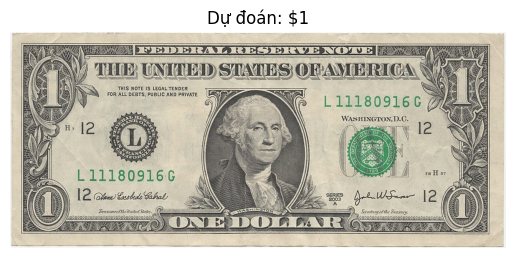

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


label_map = {
    "1 Dollar": 0,
    "2 Dollar": 1,
    "5 Dollar": 2,
    "10 Dollar": 3,
    "20 Dollar": 4,
    "50 Dollar": 5,
    "100 Dollar": 6
}
money_names = ["$1", "$2", "$5", "$10", "$20", "$50", "$100"]
data_dir = "/content/USD_Bill_Classification"


def load_money_images(data_dir, img_size=(64, 64)):
    X, Y = [], []
    for folder in os.listdir(data_dir):
        label = label_map.get(folder)
        folder_path = os.path.join(data_dir, folder)
        if label is None or not os.path.isdir(folder_path):
            continue
        for file in os.listdir(folder_path):
            path = os.path.join(folder_path, file)
            try:
                img = Image.open(path).resize(img_size).convert("RGB")
                X.append(np.array(img) / 255.0)
                Y.append(label)
            except:
                print(f"Bỏ qua ảnh lỗi: {path}")
    return np.array(X), np.array(Y)

X, Y = load_money_images(data_dir)
X_flat = X.reshape((len(X), -1))
Y_oh = to_categorical(Y, num_classes=len(label_map))
X_flat, Y_oh = shuffle(X_flat, Y_oh, random_state=42)


def build_ann(input_dim, num_classes):
    return Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

model = build_ann(64*64*3, len(label_map))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(X_flat, Y_oh, epochs=50, batch_size=16)  # Có thể điều chỉnh số epoch
model.save("usd_money_ann_model.h5")


def predict_money(image_path):
    img = Image.open(image_path).resize((64, 64)).convert("RGB")
    x = np.array(img).astype('float32') / 255.0
    x = x.reshape(1, -1)

    pred = model.predict(x)
    label = np.argmax(pred)
    money = money_names[label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {money}")
    plt.axis('off')
    plt.show()


test_images = [
    "/content/USD_Bill_Classification/test_images/1_Dollar_Bill.jpg"
]

for img_path in test_images:
    predict_money(img_path)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,456,450 (24.63 MB)

 Trainable params: 6,456,450 (24.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.7371 - loss: 0.5855
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8631 - loss: 7.2853
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.7788 - loss: 4.5530
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7579 - loss: 1.4252
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.8631 - loss: 2.7856
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8313 - loss: 0.5337
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.8948 - loss: 0.9611
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8948 - loss: 0.6249
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9474 - loss: 0.0950
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9683 - loss: 0.3740
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9683 - loss: 0.2592
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9474 - loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


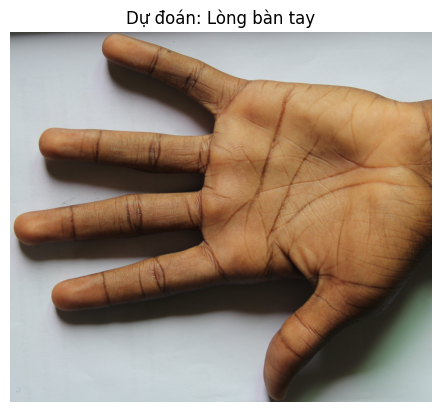

In [13]:
import os
import numpy as np
from PIL import Image
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Cấu hình nhãn
label_map = {
    "palm": 0,
    "not_palm": 1
}
class_names = ["Lòng bàn tay", "Không phải lòng bàn tay"]

# Đường dẫn đến dữ liệu đã tải
data_dir = "/content/Palm-Detection"

# Load và xử lý ảnh
X = []
Y = []
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if not os.path.isdir(folder_path) or folder not in label_map:
        continue
    label = label_map[folder]
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        try:
            img = Image.open(img_path).resize((64, 64)).convert("RGB")
            x = np.array(img).astype("float32") / 255.0
            X.append(x)
            Y.append(label)
        except:
            print(f"Bỏ qua ảnh lỗi: {img_path}")

X = np.array(X)
Y = np.array(Y)
X_flat = X.reshape((X.shape[0], 64 * 64 * 3))
Y_oh = to_categorical(Y, num_classes=2)
X_flat, Y_oh = shuffle(X_flat, Y_oh, random_state=42)

# Xây dựng mô hình ANN
model = Sequential([
    Dense(512, activation='relu', input_shape=(64*64*3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Huấn luyện
model.fit(X_flat, Y_oh, epochs=30, batch_size=16)

# Lưu mô hình
model.save("palm_recognition_ann_model.h5")
import cv2
import matplotlib.pyplot as plt

def predict_palm(image_path):
    img = Image.open(image_path).resize((64, 64)).convert('RGB')
    x = np.array(img).astype('float32') / 255.0
    x = x.reshape(1, 64*64*3)

    pred = model.predict(x)
    label = np.argmax(pred)
    result = class_names[label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {result}")
    plt.axis('off')
    plt.show()
predict_palm("/content/Palm-Detection/test/IMG_0014.JPG")

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,456,837 (24.63 MB)

 Trainable params: 6,456,837 (24.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.3802 - loss: 2.0240
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.4766 - loss: 6.1717
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.4210 - loss: 5.3407
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3637 - loss: 5.1946
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.3941 - loss: 4.3543
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5234 - loss: 1.4842
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6571 - loss: 1.2095
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4271 - loss: 2.8688
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6597 - loss: 1.5820
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6337 - loss: 2.5650
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6736 - loss: 0.7642
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5061 - loss: 2.6058


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


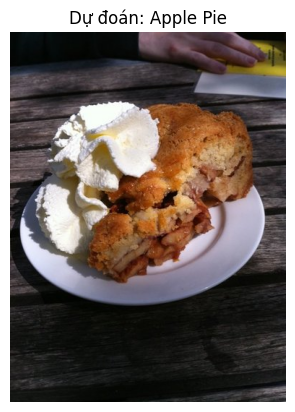

In [15]:
import os
import numpy as np
from PIL import Image
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2

# Cấu hình nhãn
label_map = {
    "apple_pie": 0,
    "bibimbap": 1,
    "cheese_cake": 2,
}
food_names = ["Apple Pie", "Bibimbap", "Cheese Cake"]

# Đường dẫn đến dữ liệu đã tải
data_dir = "/content/food101"

# Load và xử lý ảnh
X = []
Y = []
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if not os.path.isdir(folder_path) or folder not in label_map:
        continue
    label = label_map[folder]
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        try:
            img = Image.open(img_path).resize((64, 64)).convert("RGB")
            x = np.array(img).astype("float32") / 255.0
            X.append(x)
            Y.append(label)
        except:
            print(f"Bỏ qua ảnh lỗi: {img_path}")

X = np.array(X)
Y = np.array(Y)
X_flat = X.reshape((X.shape[0], 64 * 64 * 3))
Y_oh = to_categorical(Y, num_classes=5)
X_flat, Y_oh = shuffle(X_flat, Y_oh, random_state=42)

# Xây dựng mô hình ANN
model = Sequential([
    Dense(512, activation='relu', input_shape=(64*64*3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Huấn luyện
model.fit(X_flat, Y_oh, epochs=30, batch_size=16)

# Lưu mô hình
model.save("mon_an_recognition_ann_model.h5")

# Hàm dự đoán món ăn
def predict_food(image_path):
    img = Image.open(image_path).resize((64, 64)).convert('RGB')
    x = np.array(img).astype('float32') / 255.0
    x = x.reshape(1, 64*64*3)

    pred = model.predict(x)
    label = np.argmax(pred)
    food = food_names[label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {food}")
    plt.axis('off')
    plt.show()

# Ví dụ:
predict_food("/content/food101/test/103801.jpg")

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.4488 - loss: 1.4612
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3307 - loss: 4.8728
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2934 - loss: 1.5950
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4332 - loss: 1.8381
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4314 - loss: 1.1773
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3681 - loss: 1.2673
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4844 - loss: 1.0718
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4332 - loss: 1.4724
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4609 - loss: 1.2816 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4878 - loss: 1.1208
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3863 - loss: 1.1810
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5946 - l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


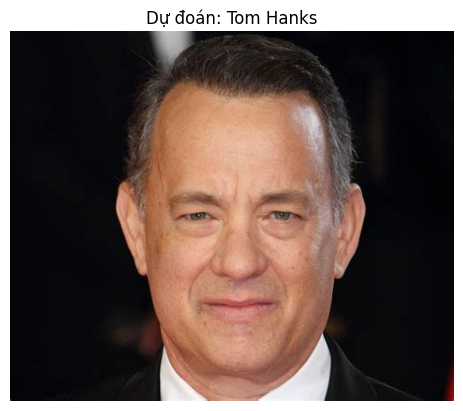

In [16]:
#Nhan dien khuon mat
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt

label_map = {
    "brad_pitt": 0,
    "will_smith": 1,
    "tom_hanks": 2,
}
face_names = ["Brad Pitt","Will Smith","Tom Hanks"]


data_dir = "/content/celeb"
X = []
Y = []

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if not os.path.isdir(folder_path) or folder_name not in label_map:
        continue
    label = label_map[folder_name]

    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        try:
            img = Image.open(img_path).resize((32, 32)).convert('RGB')
            x = np.array(img).astype('float32') / 255.0
            X.append(x)
            Y.append(label)
        except:
            print(f"Bỏ qua ảnh lỗi: {img_path}")

X = np.array(X)
Y = np.array(Y)


X_flat = X.reshape((X.shape[0], 32 * 32 * 3))
Y_oh = to_categorical(Y, num_classes=5)


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_flat, Y_oh, epochs=100, batch_size=16)

model.save("face_recognition_ann_model.h5")

def predict_face(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    x = np.array(img).astype('float32') / 255.0
    x = x.reshape(1, 32*32*3)

    pred = model.predict(x)
    label = np.argmax(pred)
    person = face_names[label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {person}")
    plt.axis('off')
    plt.show()

predict_face("/content/celeb/test/015_782498ae.jpg")